[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\tripa\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


🔹 Dataset Loaded Successfully!
Shape: (14640, 15)

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   o

C:\Users\tripa\AppData\Local\Temp\ipykernel_17832\3448012616.py:57: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sentiment', data=data, palette='coolwarm')


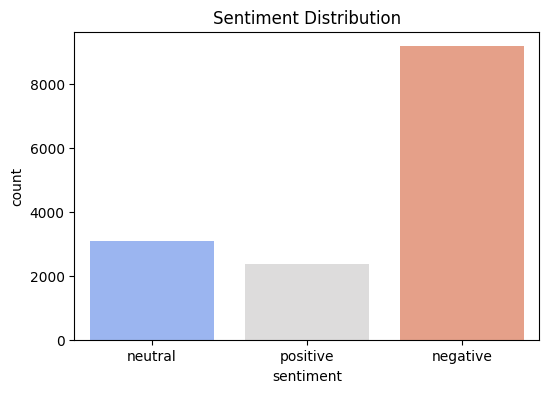

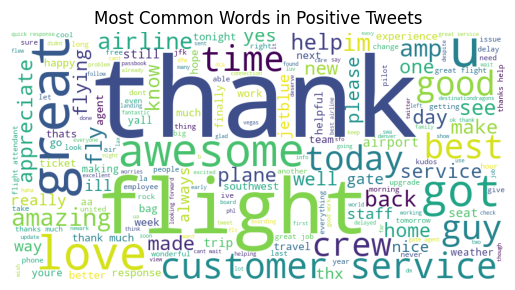


📊 Naive Bayes Accuracy: 72.88%
              precision    recall  f1-score   support

    negative       0.72      0.98      0.83      1835
     neutral       0.73      0.27      0.39       620
    positive       0.85      0.35      0.49       473

    accuracy                           0.73      2928
   macro avg       0.77      0.53      0.57      2928
weighted avg       0.74      0.73      0.68      2928


📊 Logistic Regression Accuracy: 78.14%
              precision    recall  f1-score   support

    negative       0.80      0.94      0.87      1835
     neutral       0.66      0.49      0.56       620
    positive       0.83      0.54      0.66       473

    accuracy                           0.78      2928
   macro avg       0.76      0.66      0.69      2928
weighted avg       0.78      0.78      0.77      2928


📊 SVM Accuracy: 77.49%
              precision    recall  f1-score   support

    negative       0.83      0.89      0.86      1835
     neutral       0.59      0.55

C:\Users\tripa\AppData\Local\Temp\ipykernel_17832\3448012616.py:96: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(results.keys()), y=list(results.values()), palette='Set2')


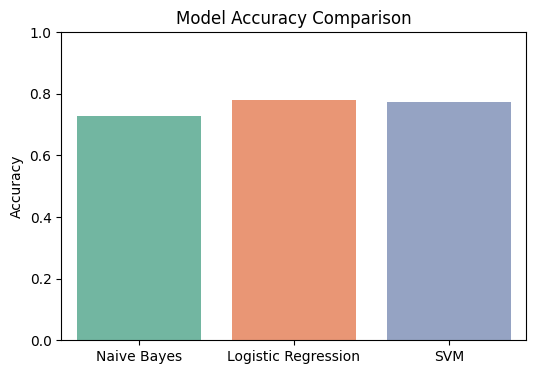

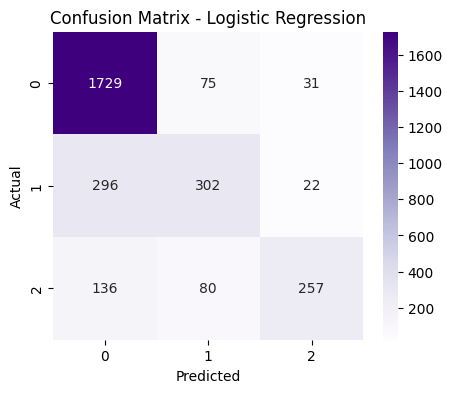

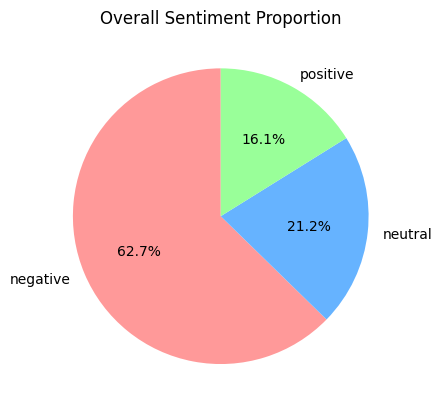


✈️ Tweet: I am so happy with the airline service!
➡️ Predicted Sentiment: positive

✈️ Tweet: The flight was delayed and staff were rude.
➡️ Predicted Sentiment: negative

✈️ Tweet: It was okay, nothing special.
➡️ Predicted Sentiment: negative


In [1]:
# ---------------------------------------------------
# 🧠 SENTIMENT ANALYSIS ON SOCIAL MEDIA DATA
# Dataset: Twitter US Airline Sentiment (Local CSV)
# Works directly in VS Code
# ---------------------------------------------------

# STEP 1️⃣: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Download stopwords
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = set(stopwords.words('english'))

# STEP 2️⃣: Load Dataset (Local CSV)
data = pd.read_csv("Tweets.csv", encoding='latin-1')

print("🔹 Dataset Loaded Successfully!")
print("Shape:", data.shape)
data.head()

# STEP 3️⃣: Basic Data Info
print("\nDataset Information:")
print(data.info())
print("\nNull Values:\n", data.isnull().sum())

# STEP 4️⃣: Keep Required Columns Only
data = data[['text', 'airline_sentiment']]
data.rename(columns={'airline_sentiment': 'sentiment'}, inplace=True)

# STEP 5️⃣: Data Cleaning Function
def clean_text(text):
    text = re.sub(r'http\S+', '', str(text))      # remove URLs
    text = re.sub(r'@\w+', '', text)              # remove mentions
    text = re.sub(r'#', '', text)                 # remove hashtags
    text = re.sub(r'[^A-Za-z\s]', '', text)       # keep letters only
    text = text.lower().split()
    text = [word for word in text if word not in stop]
    return " ".join(text)

data['clean_text'] = data['text'].apply(clean_text)

# STEP 6️⃣: Exploratory Data Analysis (EDA)
plt.figure(figsize=(6,4))
sns.countplot(x='sentiment', data=data, palette='coolwarm')
plt.title("Sentiment Distribution")
plt.show()

# WordCloud for Positive Tweets
positive_text = " ".join(data[data['sentiment']=='positive']['clean_text'])
wc = WordCloud(width=800, height=400, background_color='white').generate(positive_text)
plt.imshow(wc)
plt.axis('off')
plt.title("Most Common Words in Positive Tweets")
plt.show()

# STEP 7️⃣: Text Vectorization (TF-IDF)
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(data['clean_text']).toarray()
y = data['sentiment']

# STEP 8️⃣: Split Data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

# STEP 9️⃣: Train Multiple Models
models = {
    "Naive Bayes": MultinomialNB(),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "SVM": LinearSVC()
}

results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc
    print(f"\n📊 {name} Accuracy: {acc*100:.2f}%")
    print(classification_report(y_test, y_pred))

# STEP 🔟: Visualize Model Performance
plt.figure(figsize=(6,4))
sns.barplot(x=list(results.keys()), y=list(results.values()), palette='Set2')
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.ylim(0,1)
plt.show()

# STEP 11️⃣: Confusion Matrix for Best Model
best_model_name = max(results, key=results.get)
best_model = models[best_model_name]
y_pred_best = best_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred_best)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples')
plt.title(f'Confusion Matrix - {best_model_name}')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# STEP 12️⃣: Pie Chart of Sentiments
sentiment_counts = data['sentiment'].value_counts()
sentiment_counts.plot.pie(autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff','#99ff99'])
plt.title("Overall Sentiment Proportion")
plt.ylabel('')
plt.show()

# STEP 13️⃣: Predict Sentiment for New Text
sample = [
    "I am so happy with the airline service!",
    "The flight was delayed and staff were rude.",
    "It was okay, nothing special."
]
sample_clean = [clean_text(i) for i in sample]
sample_vec = vectorizer.transform(sample_clean)
pred = best_model.predict(sample_vec)

for txt, p in zip(sample, pred):
    print(f"\n✈️ Tweet: {txt}\n➡️ Predicted Sentiment: {p}")
